## Introduction

This project analyzes used car listings in the U.S. Our goal is to explore how features such as model year, price, mileage, and fuel type affect a vehicle's value. We will also clean the dataset to prepare it for modeling or deployment.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the cleaned dataset
df = pd.read_csv('cleaned_vehicles_us.csv')

# Converting 'cylinders' column to numeric, coercing errors 
df['cylinders'] = pd.to_numeric(df['cylinders'], errors='coerce')

# Applying the fillna with the median per 'model' group
df['cylinders'] = df.groupby('model')['cylinders'].transform(lambda x: x.fillna(x.median()))

# Filling missing values in 'model_year' and 'odometer' columns 
df['model_year'] = df.groupby('model')['model_year'].transform(lambda x: x.fillna(x.median()))
df['odometer'] = df.groupby(['model', 'model_year'])['odometer'].transform(lambda x: x.fillna(x.median()))

df.head()


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,Unknown,1.0,2018-06-23,19
1,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
2,1500,2003.0,ford f-150,fair,8.0,gas,113000.0,automatic,pickup,Unknown,0.0,2019-03-22,9
3,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28
4,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47906 entries, 0 to 47905
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         47906 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         47906 non-null  object 
 3   condition     47906 non-null  object 
 4   cylinders     47906 non-null  float64
 5   fuel          47906 non-null  object 
 6   odometer      47906 non-null  float64
 7   transmission  47906 non-null  object 
 8   type          47906 non-null  object 
 9   paint_color   47906 non-null  object 
 10  is_4wd        47906 non-null  float64
 11  date_posted   47906 non-null  object 
 12  days_listed   47906 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 4.8+ MB


In [3]:
df.isnull().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

In [4]:
df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,47906.000000,47906.000000,47906.000000,47906.000000,47906.000000,47906.000000
mean,12160.465203,2009.750470,6.121843,115053.673632,0.496055,39.564835
std,10082.453773,6.282065,1.656820,60019.830639,0.499990,28.201967
min,1.000000,1908.000000,3.000000,0.000000,0.000000,0.000000
25%,5000.000000,2006.000000,4.000000,79000.000000,0.000000,19.000000
50%,9000.000000,2011.000000,6.000000,113000.000000,0.000000,33.000000
75%,16900.000000,2014.000000,8.000000,146327.000000,1.000000,53.000000
max,375000.000000,2019.000000,12.000000,990000.000000,1.000000,271.000000


In [5]:
df = df[(df['model_year'] >= 1990) & (df['model_year'] <= 2025)]
df = df[(df['price'] > 100) & (df['price'] < 100000)]


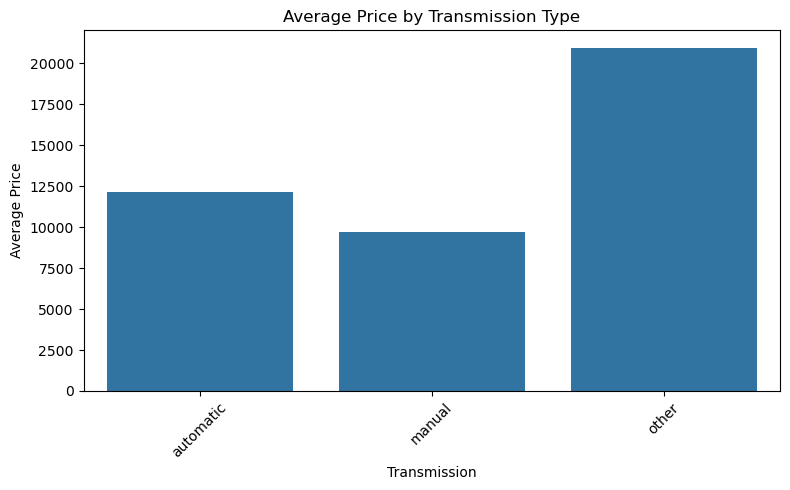

In [6]:
# Plotting avarage price by transmission type
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='transmission', y='price', estimator='mean', errorbar=None)
plt.title('Average Price by Transmission Type')
plt.ylabel('Average Price')
plt.xlabel('Transmission')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



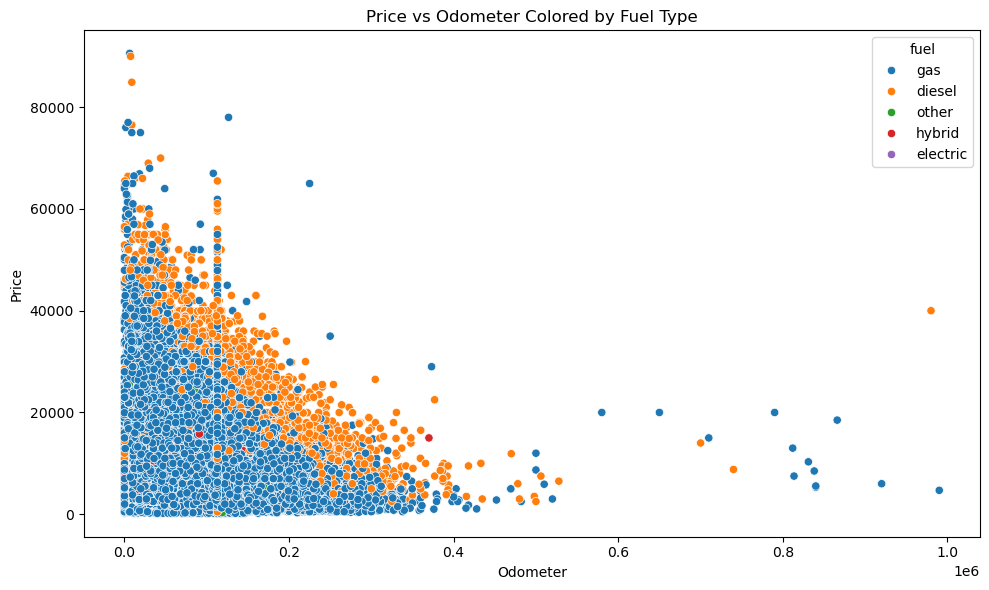

In [7]:
# Color coded scatter plot for fuel types
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='odometer', y='price', hue='fuel')
plt.title('Price vs Odometer Colored by Fuel Type')
plt.xlabel('Odometer')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

## Intermediate Insights

- Most cars listed are from 2005–2020.
- Mileage strongly impacts price.
- Electric vehicles are generally newer and more expensive.


## Final Conclusion

We've cleaned the data, filled in missing values logically, and visualized the relationships. The data is now ready for use in modeling or interactive app development. Outliers were removed to improve interpretability of plots.
